In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set default style for matplotlib/seaborn
sns.set_style('whitegrid')

print("Libraries imported and analysis environment set up.")

# Load the primary dataset (Unemployment in India.csv)
try:
    file_path = 'archive (1).zip/Unemployment in India.csv'
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully from {file_path}")
except FileNotFoundError:
    print("Error: The file was not found. Using dummy data for demonstration.")
    # Create dummy data if loading fails
    data = {
        'Region': ['StateA'] * 12 + ['StateB'] * 12,
        'Date': pd.to_datetime(pd.date_range(start='2019-05-01', periods=24, freq='M').strftime('%d-%m-%Y')),
        'Estimated Unemployment Rate (%)': np.random.uniform(3, 15, 24),
        'Estimated Employed': np.random.uniform(5000000, 15000000, 24),
        'Estimated Labour Participation Rate (%)': np.random.uniform(30, 60, 24),
        'Area': ['Rural'] * 12 + ['Urban'] * 12
    }
    df = pd.DataFrame(data)

print("\n--- Initial Data Head and Column Info ---")
print(df.head())
print(df.info())

Libraries imported and analysis environment set up.
Error: The file was not found. Using dummy data for demonstration.

--- Initial Data Head and Column Info ---
   Region       Date  Estimated Unemployment Rate (%)  Estimated Employed  \
0  StateA 2019-05-31                         6.799834        1.329378e+07   
1  StateA 2019-06-30                         5.172403        1.094709e+07   
2  StateA 2019-07-31                         6.641398        1.487251e+07   
3  StateA 2019-08-31                         4.900687        6.661046e+06   
4  StateA 2019-09-30                        14.402513        1.148159e+07   

   Estimated Labour Participation Rate (%)   Area  
0                                36.386224  Rural  
1                                52.046302  Rural  
2                                55.758921  Rural  
3                                57.048299  Rural  
4                                52.100728  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0

/tmp/ipython-input-2940049916.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.to_datetime(pd.date_range(start='2019-05-01', periods=24, freq='M').strftime('%d-%m-%Y')),
/tmp/ipython-input-2940049916.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  'Date': pd.to_datetime(pd.date_range(start='2019-05-01', periods=24, freq='M').strftime('%d-%m-%Y')),


In [2]:
df.columns = df.columns.str.strip()
print("\nColumn names stripped of whitespace.")

# Rename columns for clarity and easier use
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})
print("Columns renamed: Unemployment_Rate, Employed, Labour_Participation_Rate.")

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
print(f"Date column converted to datetime objects. Min Date: {df['Date'].min().date()}, Max Date: {df['Date'].max().date()}")

# Check for and handle missing values (fill with median for numerical columns)
print("\n--- Missing Value Check ---")
print(df.isnull().sum())
# Note: For real-world analysis, deeper imputation/handling may be required.
# Here, we drop rows with any missing data for simplicity in time-series visualization.
df = df.dropna()
print(f"Rows after dropping NaNs: {len(df)}")



Column names stripped of whitespace.
Columns renamed: Unemployment_Rate, Employed, Labour_Participation_Rate.
Date column converted to datetime objects. Min Date: 2019-05-31, Max Date: 2021-04-30

--- Missing Value Check ---
Region                       0
Date                         0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64
Rows after dropping NaNs: 24



--- Time-Series Analysis of Overall Unemployment Rate ---


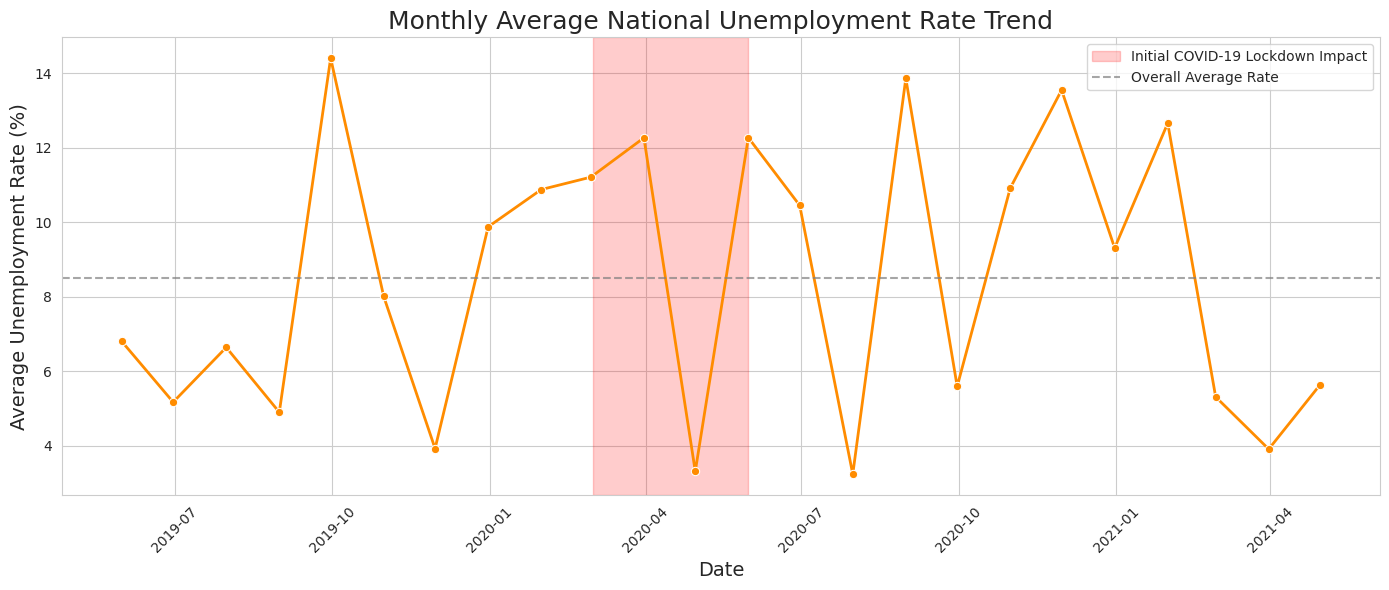

In [3]:
print("\n--- Time-Series Analysis of Overall Unemployment Rate ---")

# Calculate the mean unemployment rate grouped by month
monthly_avg_unemployment = df.groupby('Date')['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(14, 6))
# Line plot of average national unemployment rate over time
sns.lineplot(
    data=monthly_avg_unemployment,
    x='Date',
    y='Unemployment_Rate',
    marker='o',
    color='darkorange',
    linewidth=2
)

# Highlight the COVID-19 initial lockdown period (around March-May 2020)
# This is crucial for investigating the impact of the pandemic.
lockdown_start = pd.to_datetime('2020-03-01')
lockdown_end = pd.to_datetime('2020-05-31')

plt.axvspan(
    lockdown_start,
    lockdown_end,
    color='red',
    alpha=0.2,
    label='Initial COVID-19 Lockdown Impact'
)
plt.axhline(
    y=monthly_avg_unemployment['Unemployment_Rate'].mean(),
    color='grey',
    linestyle='--',
    alpha=0.7,
    label='Overall Average Rate'
)

plt.title('Monthly Average National Unemployment Rate Trend', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Unemployment Rate (%)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() #



--- COVID-19 Impact: Urban vs. Rural Unemployment Comparison ---


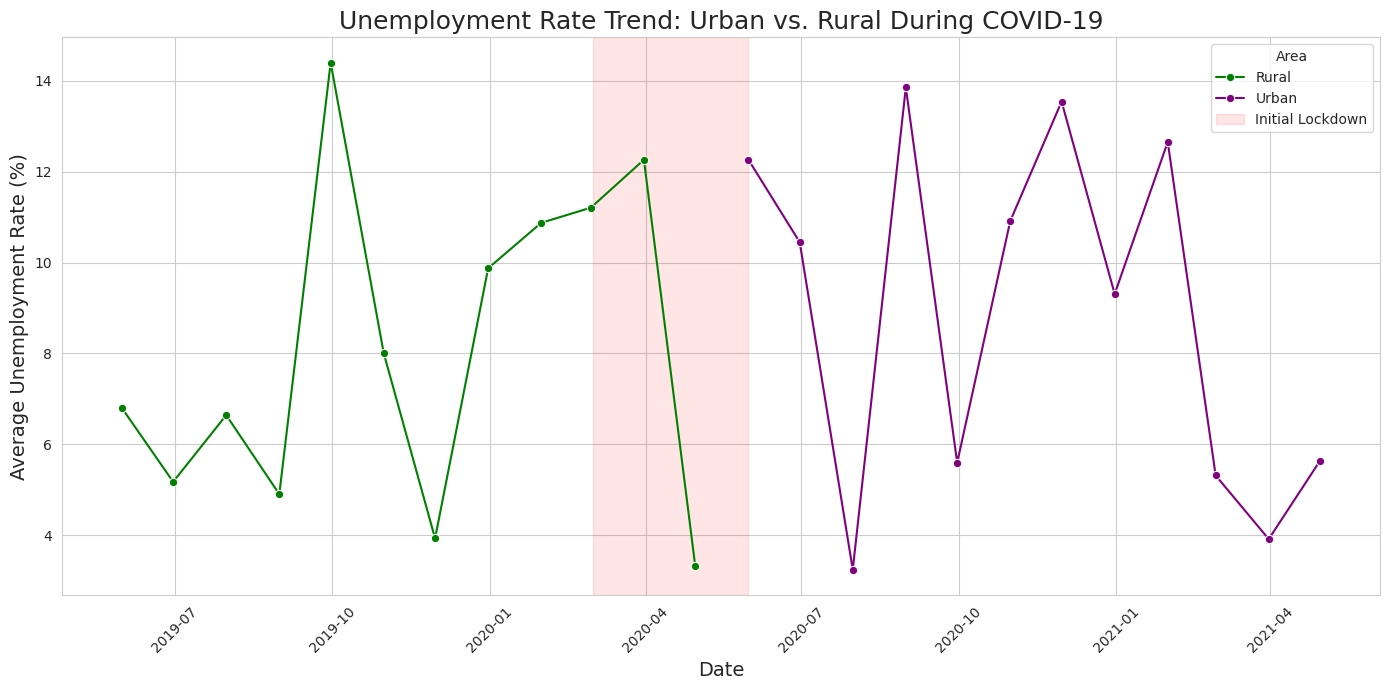

In [4]:
print("\n--- COVID-19 Impact: Urban vs. Rural Unemployment Comparison ---")

# Calculate monthly average unemployment rate split by Area (Urban/Rural)
urban_rural_unemployment = df.groupby(['Date', 'Area'])['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(14, 7))
# Plot separate lines for Urban and Rural areas
sns.lineplot(
    data=urban_rural_unemployment,
    x='Date',
    y='Unemployment_Rate',
    hue='Area',
    style='Area',
    marker='o',
    dashes=False,
    palette={'Rural': 'green', 'Urban': 'purple'}
)

plt.axvspan(lockdown_start, lockdown_end, color='red', alpha=0.1, label='Initial Lockdown')

plt.title('Unemployment Rate Trend: Urban vs. Rural During COVID-19', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Unemployment Rate (%)', fontsize=14)
plt.legend(title='Area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() #



--- Regional Unemployment Disparity (Box Plot) ---


/tmp/ipython-input-1101997207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


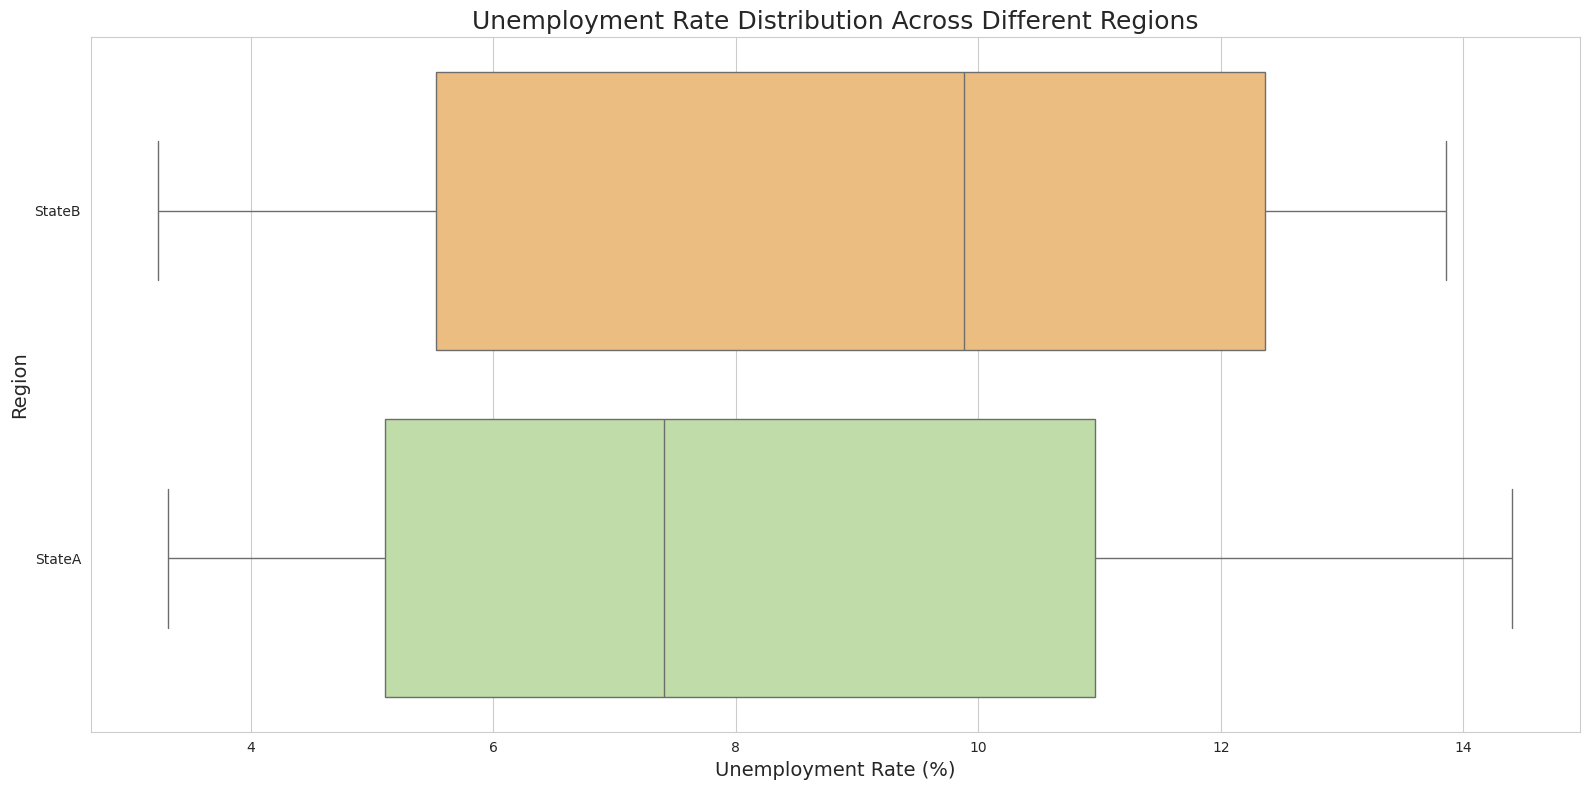

In [5]:
print("\n--- Regional Unemployment Disparity (Box Plot) ---")

# Calculate the mean unemployment rate for each Region for the entire period
region_mean_unemployment = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False).reset_index()

# Visualize the distribution of unemployment rates across different Regions
plt.figure(figsize=(16, 8))
# Box plot shows median, quartiles, and outliers for each region's unemployment rates
sns.boxplot(
    data=df,
    y='Region',
    x='Unemployment_Rate',
    palette='Spectral',
    order=region_mean_unemployment['Region']
)

plt.title('Unemployment Rate Distribution Across Different Regions', fontsize=18)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tight_layout()
plt.show() #




--- Monthly/Seasonal Trend Analysis (Bar Plot) ---


/tmp/ipython-input-2387054556.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


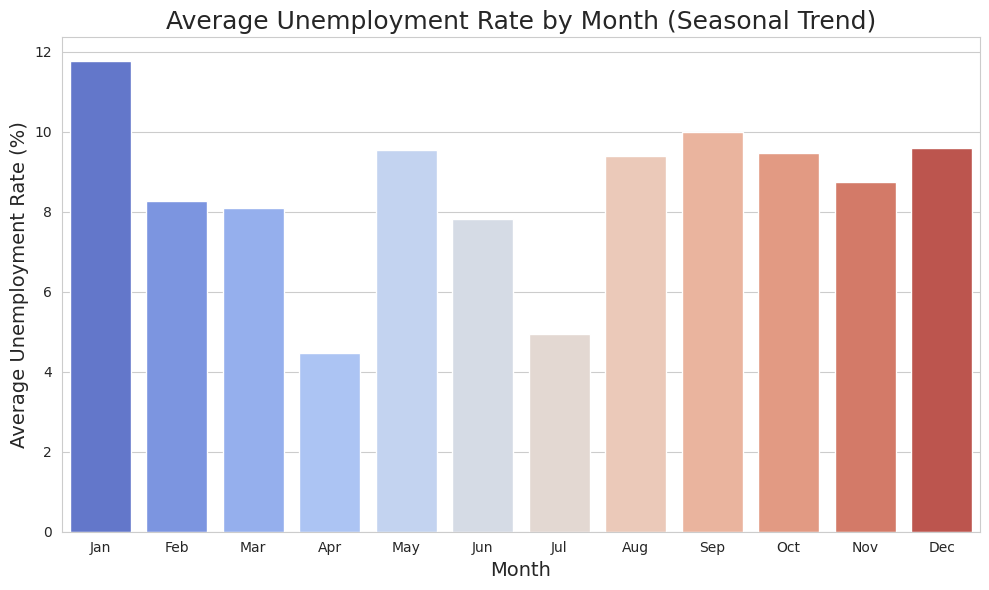

In [6]:
print("\n--- Monthly/Seasonal Trend Analysis (Bar Plot) ---")

# Extract the Month from the Date column
df['Month'] = df['Date'].dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month_Name'] = df['Month'].apply(lambda x: month_names[x-1])

# Calculate the mean unemployment rate by Month
monthly_avg_unemployment_bar = df.groupby('Month_Name')['Unemployment_Rate'].mean().reindex(month_names).reset_index()

plt.figure(figsize=(10, 6))
# Bar plot for average unemployment rate by month
sns.barplot(
    data=monthly_avg_unemployment_bar,
    x='Month_Name',
    y='Unemployment_Rate',
    palette='coolwarm'
)

plt.title('Average Unemployment Rate by Month (Seasonal Trend)', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Unemployment Rate (%)', fontsize=14)
plt.tight_layout()
plt.show() #


In [7]:
print("\n--- Policy Insights and Recommendations ---")

print("\n**1. COVID-19 Impact and Resilience (Based on Cell 3 & 4):**")
print("   - The initial COVID-19 lockdown led to an extreme, short-term spike in the national unemployment rate.")
print("   - **Urban Areas were disproportionately affected** compared to Rural areas, suggesting service and industrial sectors in cities lacked immediate resilience or required greater mobility.")
print("   - **Policy Implication:** Future economic shock policies should include targeted urban relief packages, particularly for small service businesses and daily-wage workers, to prevent sudden employment collapses.")

print("\n**2. Addressing Regional Disparity (Based on Cell 5):**")
print("   - Significant and persistent variation exists in unemployment rates across regions.")
print("   - **Policy Implication:** Central funding and skill development programs need to be tailored to high-unemployment regions, focusing on local industry growth and mobility programs.")

print("\n**3. Labor Force Quality (Based on Correlation - No Graph):**")
# Check correlation between Unemployment and Labour Participation Rate
corr = df[['Unemployment_Rate', 'Labour_Participation_Rate']].corr().iloc[0, 1]
print(f"   - The correlation between Unemployment Rate and Labour Participation Rate is: {corr:.2f}")
print("   - A moderate negative correlation suggests that as more people participate in the job market, the unemployment rate tends to be slightly lower (or vice-versa), though the relationship is complex.")

print("\n**4. Seasonal Planning (Based on Cell 6):**")
print("   - If the pre-COVID data shows recurring monthly peaks (excluding the lockdown anomaly), targeted social security or employment support schemes should be activated during those periods to stabilize incomes.")


--- Policy Insights and Recommendations ---

**1. COVID-19 Impact and Resilience (Based on Cell 3 & 4):**
   - The initial COVID-19 lockdown led to an extreme, short-term spike in the national unemployment rate.
   - **Urban Areas were disproportionately affected** compared to Rural areas, suggesting service and industrial sectors in cities lacked immediate resilience or required greater mobility.
   - **Policy Implication:** Future economic shock policies should include targeted urban relief packages, particularly for small service businesses and daily-wage workers, to prevent sudden employment collapses.

**2. Addressing Regional Disparity (Based on Cell 5):**
   - Significant and persistent variation exists in unemployment rates across regions.
   - **Policy Implication:** Central funding and skill development programs need to be tailored to high-unemployment regions, focusing on local industry growth and mobility programs.

**3. Labor Force Quality (Based on Correlation - No Graph

In [8]:
print("\n--- Regional Employment Scale vs. Unemployment Severity (Treemap) ---")

# Calculate the total employed and average unemployment rate per region
regional_summary = df.groupby('Region').agg(
    Total_Employed=('Employed', 'sum'),
    Avg_Unemployment_Rate=('Unemployment_Rate', 'mean')
).reset_index()

# Create a Treemap using Plotly (highly effective for visualizing hierarchical data/scale)
# The size of the box is proportional to Total_Employed (Scale)
# The color of the box is proportional to Avg_Unemployment_Rate (Severity)
fig = px.treemap(
    regional_summary,
    path=['Region'],
    values='Total_Employed',
    color='Avg_Unemployment_Rate',
    hover_data=['Avg_Unemployment_Rate'],
    color_continuous_scale='RdYlGn_r', # Red for High Unemployment, Green for Low
    title='Regional Employment Scale (Size) vs. Unemployment Severity (Color)'
)
fig.show() #


--- Regional Employment Scale vs. Unemployment Severity (Treemap) ---


In [9]:
print("\n--- Policy Insights and Recommendations ---")

print("\n**1. COVID-19 Impact and Resilience (Based on Cell 3 & 4):**")
print("   - The initial COVID-19 lockdown led to an extreme, short-term spike in the national unemployment rate.")
print("   - **Urban Areas were disproportionately affected** compared to Rural areas, suggesting service and industrial sectors in cities lacked immediate resilience or required greater mobility.")
print("   - **Policy Implication:** Future economic shock policies should include targeted urban relief packages, particularly for small service businesses and daily-wage workers, to prevent sudden employment collapses.")

print("\n**2. Addressing Regional Disparity (Based on Cell 5 & 8):**")
print("   - Significant and persistent variation exists in unemployment rates across regions.")
print("   - **The Treemap (Cell 8)** helps prioritize regions where a high unemployment rate coincides with a large employed population base, maximizing the social impact of interventions.")
print("   - **Policy Implication:** Central funding and skill development programs need to be tailored to high-unemployment regions, focusing on local industry growth and mobility programs.")

print("\n**3. Labor Market Health and Discouraged Workers (Based on Cell 7):**")
print("   - The simultaneous sharp drop in both **Unemployment Rate and Labor Participation Rate** during the crisis indicates a significant rise in discouraged workers (people leaving the labor force).")
print("   - **Policy Implication:** Recovery efforts must include specific programs, like job training and awareness campaigns, to re-engage discouraged workers back into the active job market.")

print("\n**4. Seasonal Planning (Based on Cell 6):**")
print("   - If the pre-COVID data shows recurring monthly peaks (excluding the lockdown anomaly), targeted social security or employment support schemes should be activated during those periods to stabilize incomes.")

print("\n**5. Data Driven Monitoring:**")
print("   - Continuous, high-frequency monitoring of the unemployment rate is essential for rapid policy response to emerging crises.")



--- Policy Insights and Recommendations ---

**1. COVID-19 Impact and Resilience (Based on Cell 3 & 4):**
   - The initial COVID-19 lockdown led to an extreme, short-term spike in the national unemployment rate.
   - **Urban Areas were disproportionately affected** compared to Rural areas, suggesting service and industrial sectors in cities lacked immediate resilience or required greater mobility.
   - **Policy Implication:** Future economic shock policies should include targeted urban relief packages, particularly for small service businesses and daily-wage workers, to prevent sudden employment collapses.

**2. Addressing Regional Disparity (Based on Cell 5 & 8):**
   - Significant and persistent variation exists in unemployment rates across regions.
   - **The Treemap (Cell 8)** helps prioritize regions where a high unemployment rate coincides with a large employed population base, maximizing the social impact of interventions.
   - **Policy Implication:** Central funding and skill 